In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras 
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, InputLayer
print(tf.version.VERSION)

2.13.0


IDEA: move images up and down an create new labels for half numbers?

In [2]:
#load data
data = pd.read_csv('data/TMNIST_Data.csv', header=0)
data

,names,labels,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,GrandHotel-Regular,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,EncodeSansCondensed-Medium,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Varela-Regular,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ArefRuqaa-Bold,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,KulimPark-Regular,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29895,Raleway[wght],7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29896,Charm-Regular,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29897,BigShouldersStencilDisplay-Black,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29898,Gabriela-Regular,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
from sklearn.model_selection import train_test_split

X = data.drop(columns = {'names', 'labels'}, axis=1)
X = X.values.reshape(-1,28,28,1) / 255.0 #normalize and reshape to square
X = 1- X #invert colors
y = data['labels']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(23920, 28, 28, 1)
(23920,)
(5980, 28, 28, 1)
(5980,)


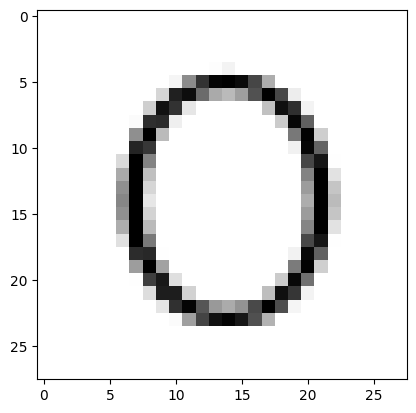

In [29]:
sample_image = X_train[1]

# Plot the image
plt.imshow(sample_image, cmap='gray')
plt.show()

In [30]:
batch_size = 128
num_classes = 10
epochs = 6
learning_rate = 0.001

In [31]:
#create model
model = Sequential()
model.add(InputLayer(input_shape=(28, 28, 1)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(Flatten())  # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation="softmax")) #no softmax for thresholding

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 flatten_3 (Flatten)         (None, 7744)              0         
                                                                 
 dense_6 (Dense)             (None, 128)               991360    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                      

In [32]:
#compile model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [33]:
#train model
history = model.fit(x=X_train, y=y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), verbose=1)

Epoch 1/6
187/187 [==============================] - 13s 65ms/step - loss: 0.3894 - accuracy: 0.8895 - val_loss: 0.0975 - val_accuracy: 0.9722
Epoch 2/6
187/187 [==============================] - 12s 62ms/step - loss: 0.0924 - accuracy: 0.9724 - val_loss: 0.0690 - val_accuracy: 0.9803
Epoch 3/6
187/187 [==============================] - 12s 63ms/step - loss: 0.0619 - accuracy: 0.9826 - val_loss: 0.0530 - val_accuracy: 0.9860
Epoch 4/6
187/187 [==============================] - 11s 61ms/step - loss: 0.0442 - accuracy: 0.9866 - val_loss: 0.0489 - val_accuracy: 0.9870
Epoch 5/6
187/187 [==============================] - 11s 61ms/step - loss: 0.0381 - accuracy: 0.9880 - val_loss: 0.0453 - val_accuracy: 0.9878
Epoch 6/6
187/187 [==============================] - 11s 60ms/step - loss: 0.0292 - accuracy: 0.9913 - val_loss: 0.0420 - val_accuracy: 0.9891


In [34]:
#evaluate model
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1] * 100)

Test loss: 0.04198380932211876
Test accuracy: 98.9130437374115


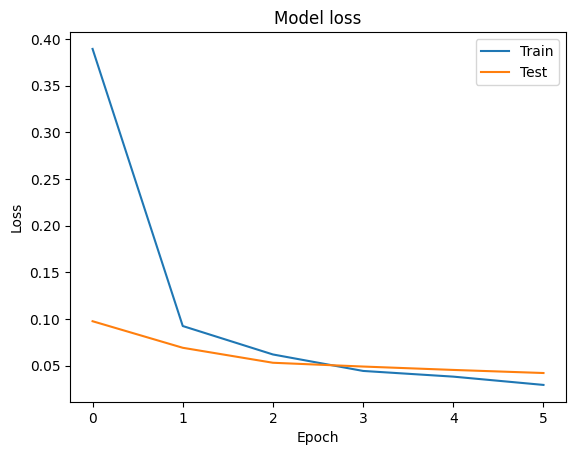

In [35]:
#plot training and test loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

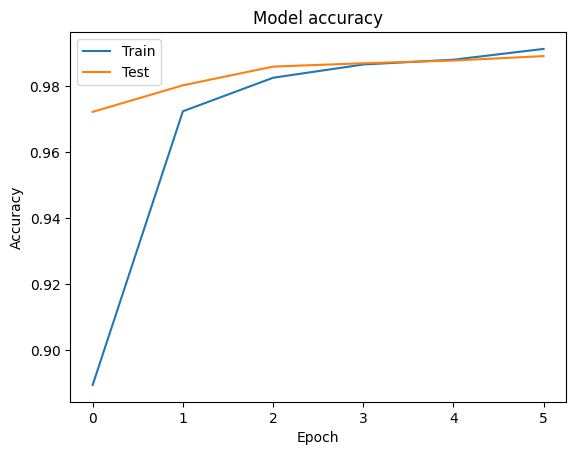

In [36]:
#plot training and test accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

In [37]:
#predict model
predictions = model.predict(X_test)
print(predictions[0])
print(np.argmax(predictions[0]))
print(y_test[:]) #why is this not indexed from 0?


187/187 [==============================] - 1s 4ms/step
[5.3612201e-15 8.4132316e-13 9.5859033e-12 1.0000000e+00 1.3924314e-14
 3.4265561e-08 8.9449834e-16 1.3181761e-11 1.7244503e-08 5.5683960e-09]
3
15756    3
19617    5
18973    8
16397    9
16366    0
        ..
708      9
23587    8
27362    3
20592    8
9934     5
Name: labels, Length: 5980, dtype: int64


In [38]:
#save model
model.save('models/TMNIST_model.keras')